Import pandas and numpy libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Import 'changes' file - some 'comment' columns have not been cleansed correctly and extend over addditional columns. Actual comments made do not appear to be important or rather their 'interestingness' is deemed low. So I have only imported columns A-F from 'changes.csv' 


In [60]:
df = pd.read_csv('changes.csv', usecols=[0,1,2,3,4,5])

In [61]:
df.head()

,revision,author,date,time,number_of_lines,comment
0,r1551925,Thomas,27/11/2015,16:57:44,1,Renamed folder to the correct name
1,r1551575,Thomas,27/11/2015,09:46:32,1,Removed unused webview.plan.management and web...
2,r1551569,Vincent,27/11/2015,09:38:09,1,enable all clients
3,r1551558,Thomas,27/11/2015,09:13:26,1,Chnaged jira url to htps
4,r1551504,/OU=Domain Control Validated/CN=svn.company.net,27/11/2015,07:05:41,1,[gradle-release] prepare for next development ...


Author appears to have some unuseful data included in the data frame.

In [62]:
df.describe()

,number_of_lines
count,422.000000
mean,1.315166
std,0.845672
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


Create a new variable for plotting authors and number of revisions.

In [63]:
auth_rev = df.groupby(["author"]).count()["revision"]
auth_rev

author
/OU=Domain Control Validated/CN=svn.company.net     24
Alan                                                 5
Dave                                                 2
Freddie                                              7
Jimmy                                              152
Nicky                                                5
Thomas                                             191
Vincent                                             26
ajon0002                                             9
murari.krishnan                                      1
Name: revision, dtype: int64

Author with name "/OU=Domain Control Validated/CN=svn.company.net" is not useful for insightfulness so I am going to remove it from auth_rev

In [64]:
auth_rev = auth_rev.drop(labels = ['/OU=Domain Control Validated/CN=svn.company.net'])

[Text(0,0.5,'No. of Revisions'), Text(0.5,0,'Authors')]

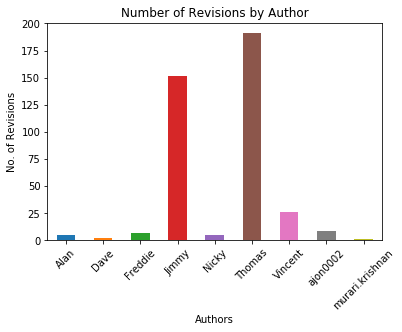

In [65]:
auth_rev.plot(kind = 'bar', title = 'Number of Revisions by Author', rot = 45, ).set(xlabel = 'Authors', ylabel = 'No. of Revisions')

INTERESTINGNESS 1:
This is interesting as it shows us that 2 staff members - Thomas and Jimmy - are highly active in making revisions. We can also see that Vincent has just over 25 commits while everyone else has less than 10 entries.

In [66]:
# new data frame with split value columns 
newtime = df["time"].str.split(":", n = 3, expand = True) 
 
# making seperate column for hours 
df["hour"]= newtime[0] 
 
# making seperate column for minutes
df["minute"]= newtime[1] 
 
# making seperate column for seconds 
df["seconds"]= newtime[2]

df = df.sort_values(by=['hour','minute'])
# df display 
df

,revision,author,date,time,number_of_lines,comment,hour,minute,seconds
32,r1548946,Vincent,23/11/2015,05:50:12,5,FTRPC-304 : Frontier - Default Backups Setting...,05,50,12
6,r1551485,Vincent,27/11/2015,06:06:30,1,SFR-108 : 1.buddy sync removed from settings. ...,06,06,30
5,r1551486,Vincent,27/11/2015,06:10:10,1,SFR-108 : preparing release for SFR,06,10,10
50,r1547493,Vincent,19/11/2015,06:31:05,4,FTRPC-304 : Frontier - Default Backups Setting...,06,31,05
4,r1551504,/OU=Domain Control Validated/CN=svn.company.net,27/11/2015,07:05:41,1,[gradle-release] prepare for next development ...,07,05,41
17,r1551061,Vincent,26/11/2015,07:33:33,3,SFR-108 : Create bilingual French/English tran...,07,33,33
242,r1510491,Freddie,26/08/2015,08:12:56,2,PHONE-1018: Phone || Files downloading is not ...,08,12,56
287,r1504239,Jimmy,12/08/2015,08:26:25,1,Added backup status,08,26,25
221,r1516078,Jimmy,09/09/2015,08:36:04,1,String updates,08,36,04
340,r1497472,Thomas,28/07/2015,08:38:12,1,Set gap strategy to GAP_HANDLING_NONE,08,38,12


In [70]:
# new data frame with split value columns 
newdate = df["date"].str.split("/", n = 3, expand = True) 
 
# making seperate column for days 
df["day"]= newdate[0] 
 
# making seperate column for months
df["month"]= newdate[1] 
 
# making seperate column for years 
df["year"]= newdate[2]

df = df.sort_values(by=['year','month', 'day', 'hour', 'minute'])
# df display 
df

,revision,author,date,time,number_of_lines,comment,hour,minute,seconds,day,month,year
421,r1491146,Thomas,13/07/2015,09:21:48,1,Rename folder,9,21,48,13,07,2015
420,r1491229,Jimmy,13/07/2015,11:03:48,1,Added configuration for web auth,11,3,48,13,07,2015
419,r1491254,Alan,13/07/2015,11:32:02,1,icon renamed as ic_launcher.png,11,32,2,13,07,2015
418,r1491272,Thomas,13/07/2015,11:52:09,1,Added ignorance,11,52,9,13,07,2015
417,r1491315,Jimmy,13/07/2015,13:06:21,1,Added web UI for auth,13,6,21,13,07,2015
416,r1491323,Jimmy,13/07/2015,13:48:50,1,Added application identifier to auth call,13,48,50,13,07,2015
415,r1491333,Jimmy,13/07/2015,13:59:14,1,directed the auth callback to point at the Atp...,13,59,14,13,07,2015
414,r1491420,Thomas,13/07/2015,16:00:35,1,Removed old TV functionality,16,0,35,13,07,2015
413,r1491421,Thomas,13/07/2015,16:03:32,1,Removed old TV functionality,16,3,32,13,07,2015
412,r1491425,Thomas,13/07/2015,16:08:55,1,Removed old TV functionality,16,8,55,13,07,2015


Replace author with user domain name to 'Unknown_Employee'

In [71]:
df['author'] = df['author'].replace('/OU=Domain Control Validated/CN=svn.company.net' ,'Unknown_Employee')

In [72]:
df[['hour', 'minute', 'seconds']] = df[['hour', 'minute', 'seconds']].apply(pd.to_numeric)
df[['day', 'month', 'year']] = df[['day', 'month', 'year']].apply(pd.to_numeric)

df.dtypes

revision           object
author             object
date               object
time               object
number_of_lines     int64
comment            object
hour                int64
minute              int64
seconds             int64
day                 int64
month               int64
year                int64
dtype: object

In [149]:
rev_time = df.groupby(['month']).count()["revision"]
rev_time.head()

month
7     102
8      83
9      44
10     97
11     96
Name: revision, dtype: int64

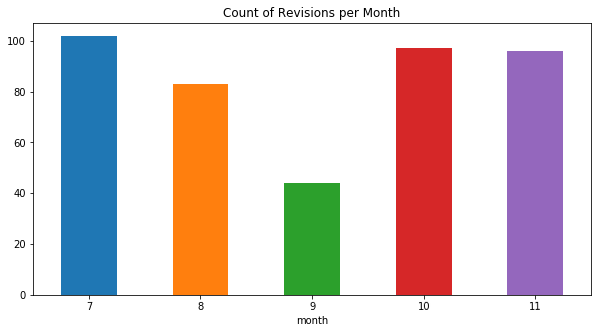

In [131]:
rev_time.plot(kind = 'bar', x='month', rot = 1, y='revision',figsize = (10,5), title = 'Count of Revisions per Month')

In [178]:
auth_date = df.groupby(['author']).agg({'month': [min, max]})
auth_date.head(12)

month    
                   min max
author                    
Alan                 7   7
Dave                 7  11
Freddie              8  11
Jimmy                7  11
Nicky                7   8
Thomas               7  11
Unknown_Employee     7  11
Vincent             10  11
ajon0002            11  11
murari.krishnan      8   8

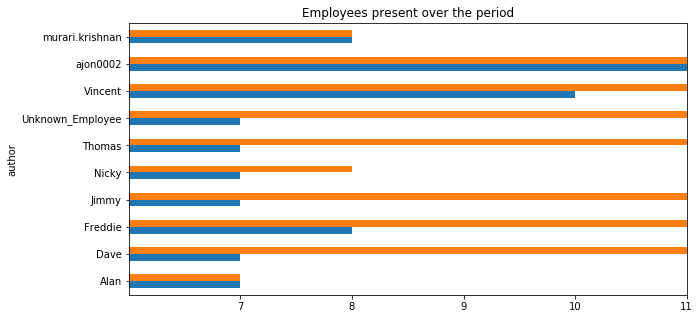

In [196]:
#f, ax = plt.subplots
auth_date.plot(kind = 'barh', legend = False,figsize = (10,5),title = 'Employees present over the period', xticks = ([7,8,9,10,11,12]), xlim = (6,11))

Interestingness #2:
We can see from the above analysis, the number of of commits was very low in September in comparison to the other months. From the above graph we can see authors who were present from July to November - blue bar representing the month the employee logged the first commit and the orange representing the month they logged their last commit.

Thomas and Jimmy were present in the organisation for the entire period under review so it is not surprising they have the most commits logged. Dave was also present in the organisation for the entire review period. Records show he has only logged 2 commits during the period of review. His productivity may be something that needs attention.

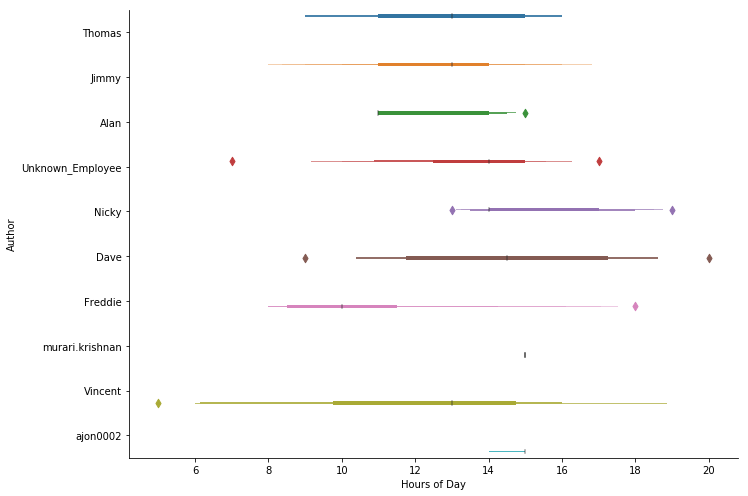

In [238]:
hours = sns.catplot(kind = 'boxen', x = 'hour', y = 'author', data = df, hue = 'author', legend = False, ci=None, height = 7, aspect = 1.5)
hours.set_axis_labels("Hours of Day", "Author")


Interestingness #3:
From the above analysis of concentration of commits throughout the workday, we can see:
> Vincent is appears to be logging the longest days, with commits occurring from early morning through to late evening.

> Thomas and Jimmy while having logged the most commits over the period, are doing so during the standard working day of 8am - 6pm.

> Dave's work day tends to start after 10am and finishes around 7pm which is not unusal in itself however we know from previous analysis he has only 2 commits logged for the review period yet he is putting in hours that are similar to Thomas and Jimmy. Dave my have some issues with his time management....